In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('data_master.csv')
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00090.au,0.377688,0.131890,1613.315725,1972.202261,3470.404015,0.058236,-177.490761,115.346103,9.969873,...,1.384242,-5.837235,5.016452,-0.748612,5.065468,-5.084879,-2.795500,2.435524,-5.375209,blues
1,blues.00047.au,0.336454,0.112245,2013.382437,2310.305516,4849.495676,0.075345,-149.951701,93.629480,6.343454,...,5.430453,-7.462271,-4.335877,-12.401641,9.624600,-5.014185,-3.704146,2.342511,4.161077,blues
2,blues.00095.au,0.369973,0.187148,1388.394749,1772.854380,2754.525010,0.057147,-130.553972,139.977099,-1.269146,...,1.611758,-6.628307,4.952240,-1.633326,0.956659,-4.840757,-5.966955,-2.782187,-6.494001,blues
3,blues.00045.au,0.429511,0.148366,1739.019621,2290.401739,4551.155813,0.048052,-163.211141,89.791041,12.979256,...,6.008639,-2.910059,-0.434613,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,blues
4,blues.00040.au,0.397725,0.134892,2272.495079,2356.855937,5108.319111,0.097657,-110.260079,90.701812,-2.527487,...,5.952405,-8.033586,4.239868,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,blues


In [3]:
df.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00090.au,0.377688,0.131890,1613.315725,1972.202261,3470.404015,0.058236,-177.490761,115.346103,9.969873,...,1.384242,-5.837235,5.016452,-0.748612,5.065468,-5.084879,-2.795500,2.435524,-5.375209,blues
1,blues.00047.au,0.336454,0.112245,2013.382437,2310.305516,4849.495676,0.075345,-149.951701,93.629480,6.343454,...,5.430453,-7.462271,-4.335877,-12.401641,9.624600,-5.014185,-3.704146,2.342511,4.161077,blues
2,blues.00095.au,0.369973,0.187148,1388.394749,1772.854380,2754.525010,0.057147,-130.553972,139.977099,-1.269146,...,1.611758,-6.628307,4.952240,-1.633326,0.956659,-4.840757,-5.966955,-2.782187,-6.494001,blues
3,blues.00045.au,0.429511,0.148366,1739.019621,2290.401739,4551.155813,0.048052,-163.211141,89.791041,12.979256,...,6.008639,-2.910059,-0.434613,-17.545474,4.154533,-5.990226,-7.860423,-8.565096,1.857711,blues
4,blues.00040.au,0.397725,0.134892,2272.495079,2356.855937,5108.319111,0.097657,-110.260079,90.701812,-2.527487,...,5.952405,-8.033586,4.239868,-16.485552,6.542503,-5.695943,-3.640864,-4.856884,1.854516,blues


In [4]:
del df['filename']

In [5]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
df = df.apply(LabelEncoder().fit_transform)

In [6]:
oneHotEncoder = OneHotEncoder(categorical_features=[26])

In [7]:
df = oneHotEncoder.fit_transform(df).toarray()

In [9]:
df

array([[  1.,   0.,   0., ..., 187., 890.,  94.],
       [  1.,   0.,   0., ..., 128., 883., 906.],
       [  1.,   0.,   0., ...,  47., 443.,  65.],
       ...,
       [  0.,   0.,   0., ..., 120., 228., 131.],
       [  0.,   0.,   0., ..., 937., 100., 486.],
       [  0.,   0.,   0., ..., 423., 460., 147.]])

In [8]:
df.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [6]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
#del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: 



count    990.000000
mean       4.500000
std        2.873733
min        0.000000
25%        2.000000
50%        4.500000
75%        7.000000
max        9.000000
Name: label, dtype: float64


/home/anil/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/anil/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


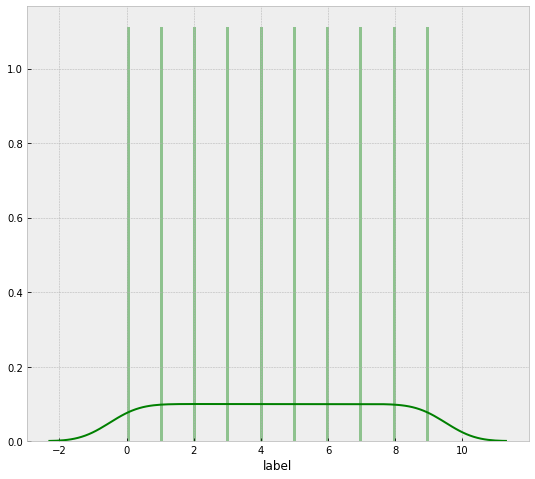

In [7]:
print(df['label'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['label'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [8]:
list(set(df.dtypes.tolist()))

[dtype('int64')]

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64','object'])
df_num.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,470,540,240,279,260,137,310,686,782,840,...,349,393,727,702,789,394,187,890,94,0
1,297,425,407,570,544,294,390,429,742,962,...,563,314,114,44,948,399,128,883,906,0
2,424,772,150,199,146,130,443,872,642,550,...,361,354,722,636,467,413,47,443,65,0
3,702,634,289,550,467,68,355,385,823,976,...,590,572,322,0,726,335,20,37,779,0
4,561,557,520,610,620,474,540,398,614,965,...,587,293,675,3,874,347,136,225,778,0


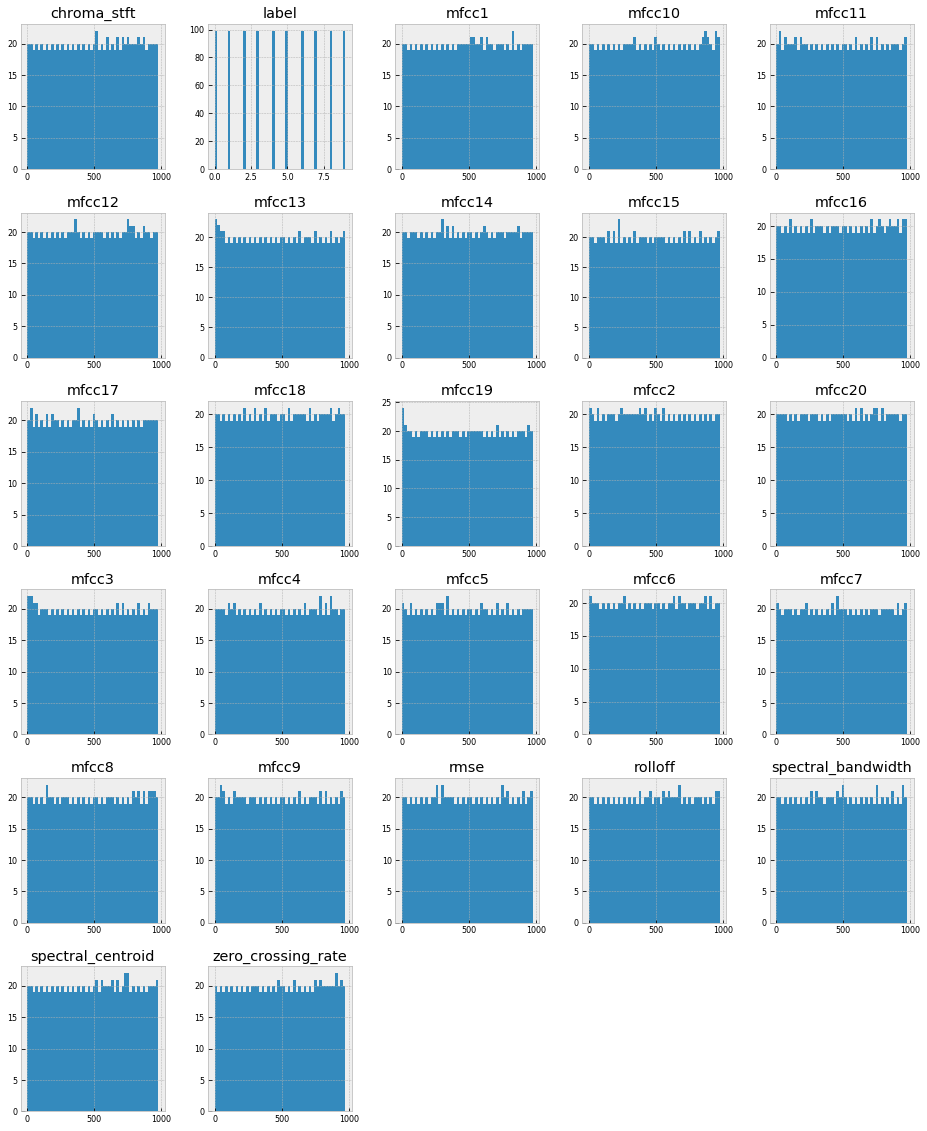

In [10]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [12]:
df_num_corr = df_num.corr()['label'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with genres:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with genres:
Series([], Name: label, dtype: float64)


In [17]:
corr = df.corr()

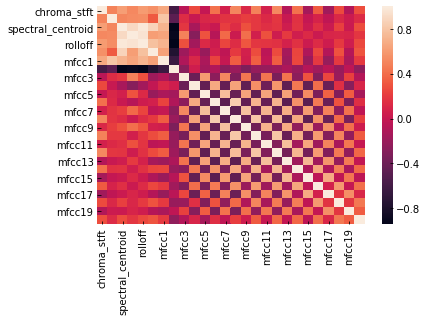

In [18]:
sns.heatmap(corr)